# Analysis and Visualization of Popular Spotify Songs

Subeg Jung Shahi
Student ID: 240079390

Lecturer: Sangita Pokhrel
Academic Associate: Prashant Bikram Shah

## Data Loading and Initial Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the  URL
url = 'https://raw.githubusercontent.com/subegshahi/datasets-for-visualization/main/Popular_Spotify_Songs.csv'
spotify_df = pd.read_csv(url, encoding='latin1')

# Display the first few rows of the dataset to understand its structure
print(spotify_df.head())


                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

## Handling Missing Values

In [2]:
# Check for missing values
spotify_df.isnull().sum()

# Fill missing values in 'in_shazam_charts' and 'key' columns
spotify_df['in_shazam_charts'].fillna(0, inplace=True)
spotify_df['key'].fillna('Unknown', inplace=True)

# Verify that there are no more missing values
spotify_df.isnull().sum()


track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

## Data Type Conversion and Cleaning

In [3]:
# Convert 'streams' column to numeric, forcing errors to NaN and then dropping them
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce')
spotify_df.dropna(subset=['streams'], inplace=True)


In [4]:
# Convert columns to appropriate data types if necessary
spotify_df['released_year'] = spotify_df['released_year'].astype(int)
spotify_df['released_month'] = spotify_df['released_month'].astype(int)
spotify_df['released_day'] = spotify_df['released_day'].astype(int)

# Remove duplicate rows
spotify_df.drop_duplicates(inplace=True)


## Visualization

### Top 10 Artists by Number of Songs

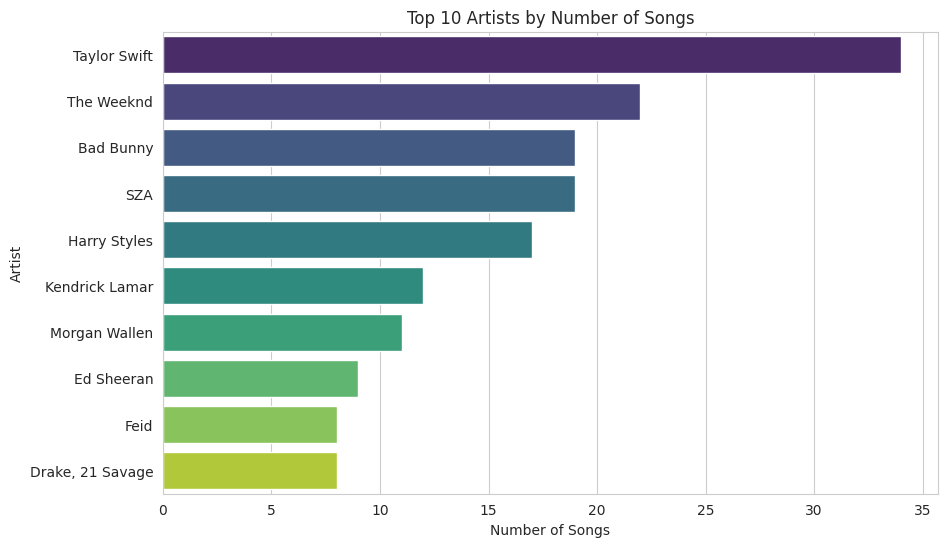

In [5]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Top 10 artists by number of songs
top_artists = spotify_df['artist(s)_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, hue=top_artists.index, dodge=False, palette='viridis', legend=False)
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()


### Distribution of Songs by Year

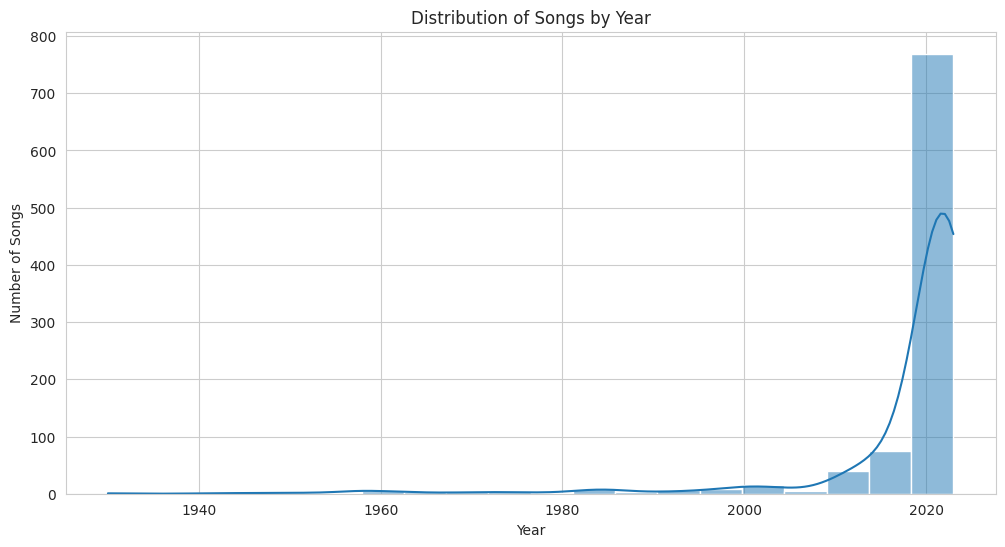

In [6]:
# Distribution of songs by year
plt.figure(figsize=(12, 6))
sns.histplot(spotify_df['released_year'], bins=20, kde=True)
plt.title('Distribution of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()


### Top 10 Most Popular Songs by Streams

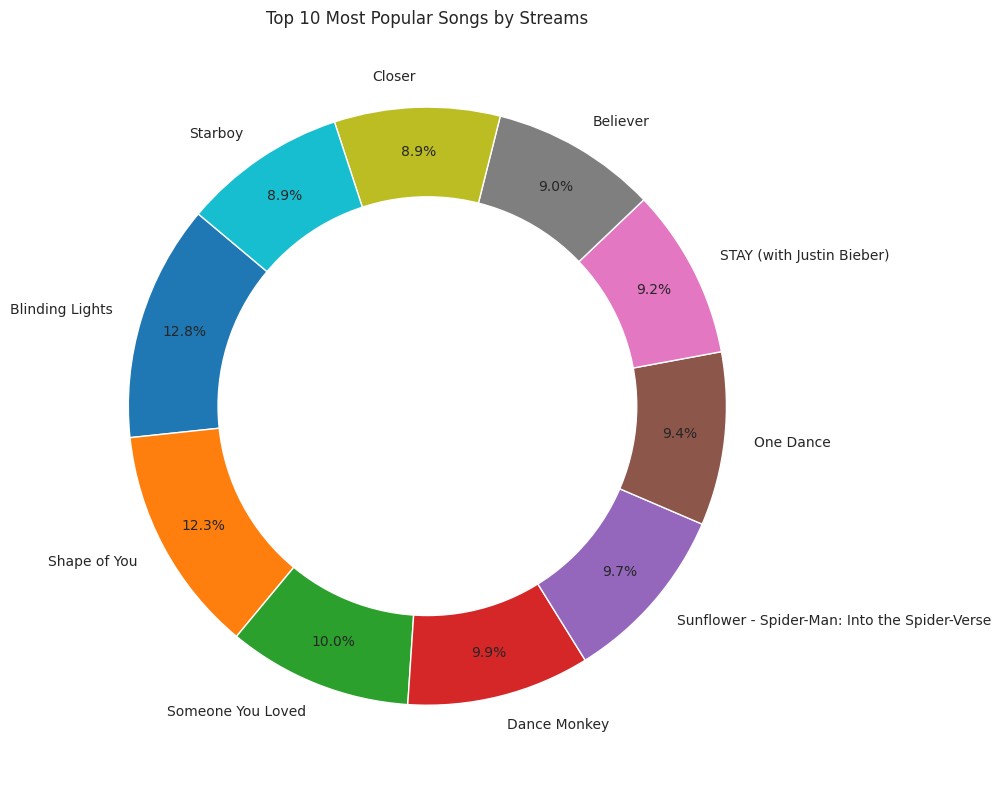

In [7]:
# Top 10 most popular songs by streams
top_songs = spotify_df[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

# Data for the donut chart
labels = top_songs['track_name']
sizes = top_songs['streams']

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, startangle=140, autopct='%1.1f%%', pctdistance=0.85)

# Draw a circle at the center to turn the pie chart into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Most Popular Songs by Streams')
plt.tight_layout()
plt.show()


### Distribution of Danceability

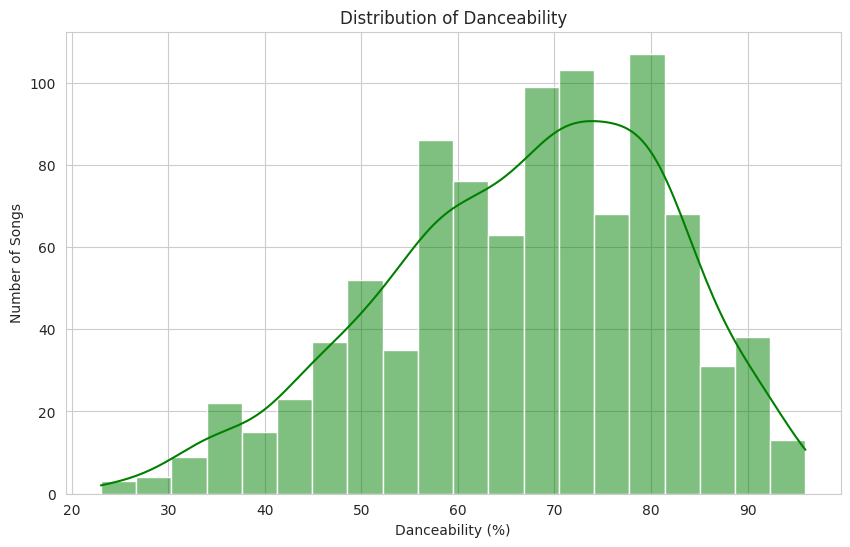

In [8]:
# Distribution of danceability
plt.figure(figsize=(10, 6))
sns.histplot(spotify_df['danceability_%'], bins=20, kde=True, color='green')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability (%)')
plt.ylabel('Number of Songs')
plt.show()


### Correlation Heatmap of Audio Features

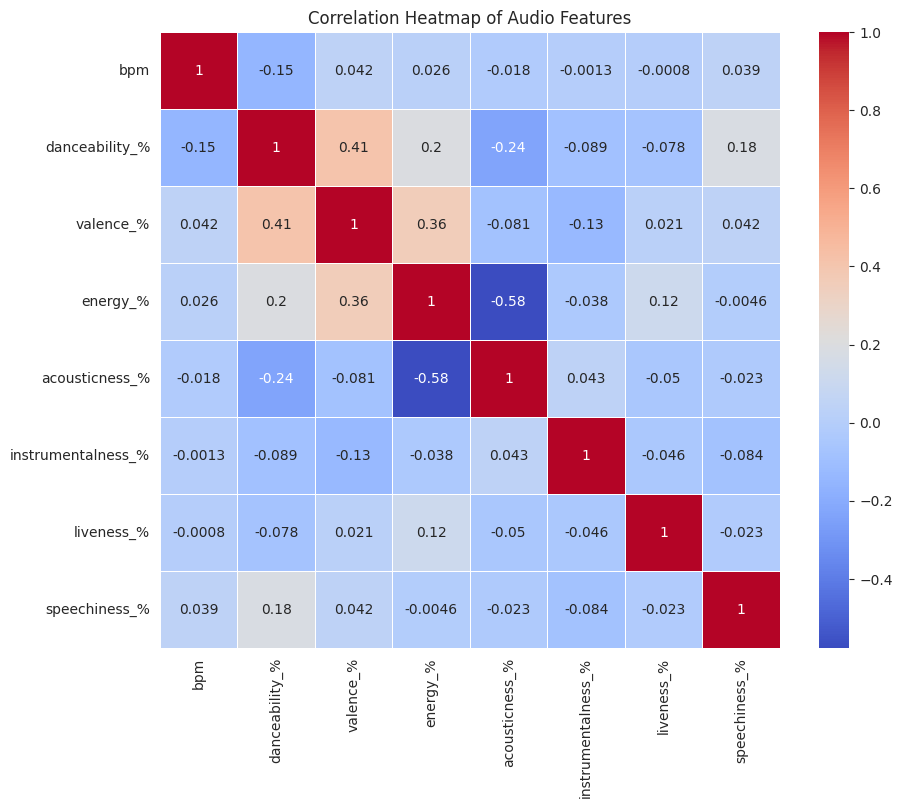

In [9]:
# Correlation heatmap of audio features
audio_features = spotify_df[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

plt.figure(figsize=(10, 8))
sns.heatmap(audio_features.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Audio Features')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5e208729-6ec7-491d-90b9-fe8331b897bf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>